# Problem Set 2, due April 27th at 3:30 pm

**Please Note:** This assignment will likely take you a _long_ time, especially if you are new to Python. Start early!

## Introduction to the assignment

For this assignment, you will be using data from the [Progresa program](http://en.wikipedia.org/wiki/Oportunidades), a government social assistance program in Mexico. This program, as well as the details of its impact, are described in the paper "[School subsidies for the poor: evaluating the Mexican Progresa poverty program](http://www.sciencedirect.com/science/article/pii/S0304387803001858)", by Paul Shultz (available on Canvas). Please familiarize yourself with the PROGRESA program before beginning this problem set, so you have a rough sense of where the data come from and how they were generated. If you just proceed into the problem set without understanding Progresa or the data, it will be very difficult!

The goal of this problem set is to implement some of the basic econometric techniques that you are learning in class to measure the impact of Progresa on secondary school enrollment rates. The timeline of the program was:

 * Baseline survey conducted in 1997
 * Intervention begins in 1998, "Wave 1" of data collected in 1998
 * "Wave 2 of data" collected in 1999
 * Evaluation ends in 2000, at which point the control villages were treated. 
 
When you are ready, download the progresa_sample.csv data from Canvas. The data are actual data collected to evaluate the impact of the Progresa program.  In this file, each row corresponds to an observation taken for a given child for a given year. There are two years of data (1997 and 1998), and just under 40,000 children who are surveyed in each year. For each child-year observation, the following variables are collected:

| Variable name | Description|
|---------|---------|
|year	  |year in which data is collected
|sex	  |male = 1|
|indig	  |indigenous = 1|
|dist_sec |nearest distance to a secondary school|
|sc	      |enrolled in school in year of survey|
|grc      |grade enrolled|
|fam_n    |family size|
|min_dist |	min distance to an urban center|
|dist_cap |	min distance to the capital|
|poor     |	poor = 'pobre'|
|progresa |treatment = 'basal'|
|hohedu	  |years of schooling of head of household|
|hohwag	  |monthly wages of head of household|
|welfare_index|	welfare index used to classify poor|
|hohsex	  |gender of head of household (male=1)|
|hohage   |age of head of household|
|age      |years old|
|folnum	  |individual id|
|village  |	village id|
|sc97	  |schooling in 1997|

In [50]:
import sys; print(sys.version)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

2.7.12 |Anaconda 4.0.0 (64-bit)| (default, Jun 29 2016, 11:07:13) [MSC v.1500 64 bit (AMD64)]


---
##Part 1: Descriptive analysis

### 1.1	Summary Statistics

a) Present number of missing observations for every single variable


In [51]:
progresa_df = pd.read_csv('progresa_sample.csv')

In [52]:
progresa_df.head()

,year,sex,indig,dist_sec,sc,grc,fam_n,min_dist,dist_cap,poor,...,hohedu,hohwag,welfare_index,hohsex,hohage,age,village,folnum,grc97,sc97
0,97,0.0,0.0,4.473,1.0,7.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,13,163,1,7,1.0
1,98,0.0,0.0,4.473,1.0,8.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,14,163,1,7,1.0
2,97,1.0,0.0,4.473,1.0,6.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,12,163,2,6,1.0
3,98,1.0,0.0,4.473,1.0,7.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,13,163,2,6,1.0
4,97,0.0,0.0,4.473,1.0,2.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,8,163,3,2,1.0


In [53]:
#Calculate missing values for each column
progresa_df.isnull().sum()

year                0
sex                24
indig             300
dist_sec            0
sc               8453
grc              6549
fam_n               0
min_dist            0
dist_cap            0
poor                0
progresa            0
hohedu              0
hohwag              0
welfare_index     210
hohsex             20
hohage             10
age                 0
village             0
folnum              0
grc97               0
sc97             3872
dtype: int64

b) Present summary statistics (mean and standard deviation) for all of the demographic variables in the dataset (i.e., everything except year, folnum, village). Present these in a single table alphabetized by variable name. Do NOT simply expect the grader to scroll through your output!

In [54]:
stat_df = progresa_df.describe()
stat_df.sort_index(axis=1, inplace=True)

In [55]:
stat_df = stat_df.drop(['year', 'village','folnum'], axis=1)
stat_df[1:3]

,age,dist_cap,dist_sec,fam_n,grc,grc97,hohage,hohedu,hohsex,hohwag,indig,min_dist,sc,sc97,sex,welfare_index
mean,11.366460,147.674452,2.418910,7.215715,3.963537,3.705372,44.436717,2.768104,0.925185,586.985312,0.298324,103.447520,0.819818,0.813922,0.512211,690.346564
std,3.167744,76.063134,2.234109,2.352900,2.499063,2.572387,11.620372,2.656106,0.263095,788.133664,0.457525,42.089441,0.384342,0.389172,0.499854,139.491130


### 1.2 Differences at baseline?

Are the baseline (1997) demographic characteristics **for the poor**  different in treatment and control villages? Hint: Use a T-Test to determine whether there is a statistically significant difference in the average values of each of the variables in the dataset. Focus only on the data from 1997 for individuals who are poor (i.e., poor=='pobre').

Present your results in a single table with the following columns and 14 (or so) rows:

| Variable name | Average value (Treatment villages) | Average value (Control villages) | Difference (Treat - Control) | p-value |
|------|------|------|------|------|
|Male  |?     |?     |?     |?     |


In [56]:
#Data Preparation
#Subsetting the data frame for the year 1997 and for the individuals who are poor
progresa_df_ttest = progresa_df[(progresa_df['year']==97) & (progresa_df['poor']=='pobre')]

#Filtering Numeric Values for the t-test
progresa_df_ttest = progresa_df_ttest.drop(['year', 'village','folnum'], axis=1)

#T-test
#Defining Treatment and control category and dropping null values
treatment_group=progresa_df_ttest[progresa_df_ttest['progresa']=='basal'].dropna()
control_group = progresa_df_ttest[progresa_df_ttest['progresa']=='0'].dropna()

#Getting numeric data for treatment and control group
treatment_group_numeric = treatment_group._get_numeric_data()

In [57]:
#Import the ttest library from Scipy.stats package
from scipy.stats import ttest_ind

#Function to calculate the required means from treatment and control group and t_value and p_value.
def ttest(x):
    mean_t = treatment_group[x].mean()
    mean_c = control_group[x].mean()
    t_value, p_value = ttest_ind(treatment_group[x], control_group[x])
    
    if p_value < 0.05:
        stat_sig = 'True'
    else: stat_sig = 'False'
        
    return (x,mean_t, mean_c, t_value,p_value, stat_sig)

In [58]:
#Forming a list of all variables for which t-test is to be performed.
list_ttest = list(treatment_group_numeric.columns)

#Performing the t-test

j=[] #An empty list to store the results
for i in list_ttest:
    j.append(ttest(i))
    
#Converting the list of tuples into a dataframe
pd.DataFrame(j, columns=['Variable', 'Avg_Treatment_Group', 'Avg_Control_Group', 't_value', 'p_value', 'Statistically Significant?'])

,Variable,Avg_Treatment_Group,Avg_Control_Group,t_value,p_value,Statistically Significant?
0,sex,0.520268,0.506556,2.334621,1.956962e-02,True
1,indig,0.316744,0.325306,-1.561670,1.183760e-01,False
2,dist_sec,2.399648,2.400687,-0.041252,9.670949e-01,False
3,sc,0.822697,0.815066,1.689261,9.117959e-02,False
4,grc,3.709214,3.733653,-0.851002,3.947750e-01,False
5,fam_n,7.281032,7.302939,-0.800187,4.236088e-01,False
6,min_dist,107.395231,103.098348,8.766462,1.936661e-18,True
7,dist_cap,151.801472,154.492095,-2.927983,3.414194e-03,True
8,hohedu,2.726729,2.660982,2.224346,2.613239e-02,True
9,hohwag,550.207086,580.694452,-3.640301,2.727661e-04,True


### 1.3 Interpretation

* A: Are there statistically significant differences between treatment and control villages as baseline? 
* B: Why does it matter if there are differences at baseline?
* C: What does this imply about how to measure the impact of the treatment?

A: Statistical significance is decided upon the measure of the p-value. If the p-value is less than 0.05, we can say that there is significant difference between the treatment and control groups as baseline. As we can see in the dataframe above, that these two groups are significantly different in terms of sex, dist_sec (nearest distance to a secondary school), min_dist (min distance to an urban center), dist_cap (min distance to the capital), hohedu (years of schooling of head of household), hohwag (monthly wages of head of household),hohage (age of head of household), welfare_index (welfare index used to classify poor) variables.

B: For any comparison between treatment and control, it is required to have a same baseline so as to gauge the actual effect of the treatment. Thus if treatment and control group are significantly different at baseline then we cant have fully randomized sets for the experiments.

C: As there is significant differenc between some of the variables for treatment and control groups, we cannot measure the true impact.

### 1.4 Graphical exploration, part 1

For each level of household head education, compute the average enrollment rate in 1997. Create a scatterplot that shows this relationship. What do you notice?

In [59]:
edu_enrollment_df = progresa_df['sc'].groupby(progresa_df['hohedu']).mean().reset_index()

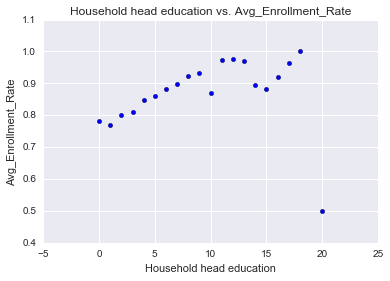

In [60]:
plt.scatter(edu_enrollment_df['hohedu'],edu_enrollment_df['sc'])
plt.ylabel('Avg_Enrollment_Rate')
plt.xlabel('Household head education')
plt.title('Household head education vs. Avg_Enrollment_Rate')

### 1.5 Graphical exploration, part 2

Create a histogram of village enrollment rates **among poor households in treated villages**, before and after treatment. Specifically, for each village, calculate the average rate of enrollment of poor households in treated villages in 1997, then compute the average rate of enrollment of poor households in treated villages in 1998. Create two separate histograms showing the distribution of these average enrollments rates, one histogram for 1997 and one histogram for 1998. On each histogram, draw a vertical line that intersects the x-axis at the average value (across all households).
* Does there appear to be a difference? Is this difference statistically significant?
* Which D estimator in Schultz (2004) does this approach correspond to?

In [61]:
#Filtering the data for poor households in treated villages in the year 1997
poor_treated_97_df = progresa_df[(progresa_df['year'] == 97 )
                                   & (progresa_df['progresa'] == 'basal' )
                                   & (progresa_df['poor'] == 'pobre')]

#Calculating the average enrollment by village
poor_trated_97_by_village = poor_treated_97_df['sc'].groupby(poor_treated_97_df['village']).mean().reset_index()

#Filtering the data for poor households in treated villages in the year 1998
poor_treated_98_df = progresa_df[(progresa_df['year'] == 98 )
                                   & (progresa_df['progresa'] == 'basal' )
                                   & (progresa_df['poor'] == 'pobre')]

#Calculating the average enrollment by village
poor_trated_98_by_village = poor_treated_98_df['sc'].groupby(poor_treated_98_df['village']).mean().reset_index()

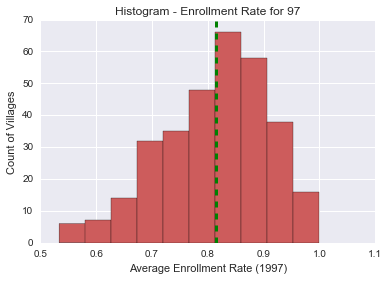

In [62]:
plt.hist(poor_trated_97_by_village['sc'],color='indianred')
plt.axvline(poor_trated_97_by_village['sc'].mean(), color='green', linestyle='dashed', linewidth=3)
plt.xlabel('Average Enrollment Rate (1997)')
plt.ylabel('Count of Villages')
plt.title('Histogram - Enrollment Rate for 97')

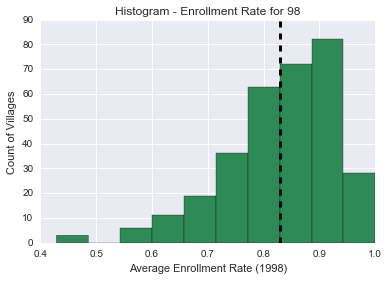

In [63]:
plt.hist(poor_trated_98_by_village['sc'],color='seagreen')
plt.axvline(poor_trated_98_by_village['sc'].mean(), color='black', linestyle='dashed', linewidth=3)
plt.xlabel('Average Enrollment Rate (1998)')
plt.ylabel('Count of Villages')
plt.title('Histogram - Enrollment Rate for 98')

In [64]:
#Performing T-test on the results to find out significance
t,p = ttest_ind(poor_trated_98_by_village['sc'],poor_trated_97_by_village['sc'])
print t,p

2.01571348652 0.0442487003657


As p_value from the t-test is 0.04 which is less than 0.05, village enrollment rates among poor households in treated villages, before and after treatment is statistically significant.

## Part 2: Measuring Impact

### 2.1 Simple differences: T-test

Start out by estimating the impact of Progresa using "simple differences." Restricting yourself to data from 1998 (after treatment).
* calculate the average enrollment rate among **poor** households in the Treatment villages and the average enrollment rate among **poor** households in the control villages.
* Which difference estimator in Schultz (2004) does this approach correspond to?
* Use a t-test to determine if this difference is statistically significant. What do you conclude?

In [65]:
#Average Enrollments among poor households in 1998

#Treatment Villages
treatment_enrollment_98_df = progresa_df[(progresa_df['year'] == 98) 
                                        & (progresa_df['poor'] == 'pobre')
                                        & (progresa_df['progresa'] == 'basal')]
#Control Villages
control_enrollment_98_df = progresa_df[(progresa_df['year'] == 98) 
                                        & (progresa_df['poor'] == 'pobre')
                                        & (progresa_df['progresa'] == '0')]

#T-test
t = ttest_ind(treatment_enrollment_98_df['sc'], control_enrollment_98_df['sc'], nan_policy='omit')

#Average enrollment rates
mt = treatment_enrollment_98_df['sc'].mean()
mc = control_enrollment_98_df['sc'].mean()

In [66]:
#Organizing the results
df = pd.DataFrame([mt,mc,t[0],t[1]])
df.reset_index()
df.rename(index={0: 'Average_Treatment',1:'Average_Control',2:'T-statistic',3:'p-value'}).reset_index()

,index,0
0,Average_Treatment,8.464791e-01
1,Average_Control,8.076370e-01
2,T-statistic,8.358721e+00
3,p-value,6.636344e-17


### 2.2 Simple differences: Regression

Estimate the effects of Progresa on enrollment using a regression model, by regressing the 1998 enrollment rates **of the poor** on treatment assignment. Discuss the following:

* Based on this model, how much did Progresa increase the likelihood of a child enrolling?
* How does your regression estimate compare to your t-test estimate from part 2.1?
* Based on this regression model, can we reject the null hypothesis that the treatment effects are zero? 
* What is the counterfactual assumption underlying this regression?

In [67]:
# Filtering poor households in 98 
enrollment_98_poor_df = progresa_df[(progresa_df['year'] == 98) 
                                        & (progresa_df['poor'] == 'pobre')].dropna()

In [68]:
from statsmodels.formula.api import ols
#Linear model
lm_fit= ols(formula='sc ~ progresa', data=enrollment_98_poor_df).fit()

#Summary of the fitted model
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     65.64
Date:                Mon, 01 May 2017   Prob (F-statistic):           5.66e-16
Time:                        23:44:12   Log-Likelihood:                -11171.
No. Observations:               26155   AIC:                         2.235e+04
Df Residuals:                   26153   BIC:                         2.236e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept             0.8109      0.004    217.190      0.000         0.804     0.818
progresa[T.basal]     0.0383      0.005      8.102      0.000         0.029     0.048
==============================================================================
Omnibus:                     7487.800   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15756.374
Skew:                          -1.796   Prob(JB):                         0.00
Kurtosis:                       4.245   Cond. No.                         3.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. The coefficient of progresa variable is 0.0388, which means, for a unit increase in progresa, the enrollment would increase by 0.0388 percent. A unit increase in progresa would mean enrollment, thus we can say Progresa increased the liklihood of a child enrolling by 0.0388%.

2. The t-test estimate from 2.1 is in sync with regression model. This can be concluded from the regression value calculated for the above model : 0.8076 + 1* 0.0388 = 0.8464, which is also the Average enrollment rate among poor households in the Treatment villages. Considering for control group, we would get a regression value of 0.8076, which is Average enrollment rate among poor households in the Control villages.

3. Hence, we can reject the null hypothesis as the pvalue for the intercept is lesser than 0.05. Thus treatment has made an effect on the enrollment.

4. The counterfactual assumption underlying this regression is that if there was no treatment, such change couldnt have been observed.

(0.8, 0.86)

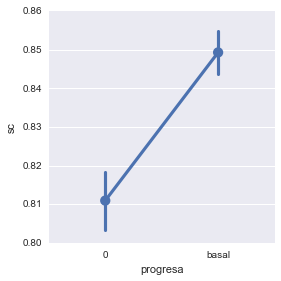

In [69]:
#Use seaborn factorplot function to do a linear fit automatically!
lm = sns.factorplot('progresa', 'sc', data=enrollment_98_poor_df)
axes = lm.axes
axes[0,0].set_ylim(0.8,0.86)

### 2.3 Multiple Regression

Re-run the above regression estimated but this time include a set of control variables. Include, for instance, age, distance to a secondary school, gender, education of household head, indigenous, etc.

* How do the controls affect the point estimate of treatment effect?
* How do the controls affect the standard error on the treatment effect? 
* How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?

In [70]:
#Multiple Linear model
lm_fit2= ols(formula='sc ~ age + progresa + indig + dist_sec + sex + hohedu + welfare_index + fam_n + hohwag + hohsex + hohage', data=enrollment_98_poor_df).fit()

#Summary of the fitted model
lm_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     850.2
Date:                Mon, 01 May 2017   Prob (F-statistic):               0.00
Time:                        23:44:14   Log-Likelihood:                -7204.9
No. Observations:               26155   AIC:                         1.443e+04
Df Residuals:                   26143   BIC:                         1.453e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept             1.4897      0.019     78.479      0.000         1.452     1.527
progresa[T.basal]     0.0350      0.004      8.604      0.000         0.027     0.043
age                  -0.0652      0.001    -91.496      0.000        -0.067    -0.064
indig                 0.0491      0.004     11.529      0.000         0.041     0.057
dist_sec             -0.0108      0.001    -11.514      0.000        -0.013    -0.009
sex                   0.0307      0.004      7.785      0.000         0.023     0.038
hohedu                0.0084      0.001      9.685      0.000         0.007     0.010
welfare_index      2.387e-05   1.86e-05      1.286      0.198     -1.25e-05  6.03e-05
fam_n                -0.0005      0.001     -0.559      0.576        -0.002     0.001
hohwag            -2.526e-06   2.86e-06     -0.883      0.377     -8.13e-06  3.08e-06
hohsex                0.0116      0.008      1.468      0.142        -0.004     0.027
hohage                0.0002      0.000      1.240      0.215        -0.000     0.001
==============================================================================
Omnibus:                     3018.149   Durbin-Watson:                   1.719
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4175.866
Skew:                          -0.968   Prob(JB):                         0.00
Kurtosis:                       3.292   Cond. No.                     1.00e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1. Adding the control variables hasnt affected the treatment effect. The coefficient of progresa variable hasnt changed much from (0.0388 to 0.0353) and also its p value is still statistically significant. Thus the treatment of providing subsidy to poor children has increased the enrollment rate. Some of the other control variables also have a statistically significant value thus having an affect on the treatment. We can also see that the intercept value has increased considerably

2. After adding the control variables, the standard error for treament has reduced from 0.005 to 0.004. Thus we can conlcude that introduction of new control variables has improved the model accuracy.

### 2.4 Difference-in-Difference, version 1 (tabular)

Thus far, we have computed the effects of Progresa by estimating the difference in 1998 enrollment rates across villages. An alternative approach would be to compute the treatment effect using a difference-in-differences framework.

Begin by estimating the average treatment effects of the program for poor households using data from 1997 and 1998. Specifically, calculate the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages; then compute the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages. The difference between these two differences is your estimate.

* What is your estimate of the impact, and how does it compare to your earlier (simple difference) results?
* What is the counterfactual assumption underlying this estimate? 


In [71]:
#Filtering for year , poor and progresa
progresa_97_treatment = progresa_df[(progresa_df.poor=='pobre') & (progresa_df.year==97) 
                                    & (progresa_df.progresa=='basal')] 

progresa_97_control = progresa_df[(progresa_df.poor=='pobre') & (progresa_df.year==97) 
                                  & (progresa_df.progresa=='0')] 

progresa_98_treatment = progresa_df[(progresa_df.poor=='pobre') & (progresa_df.year==98) 
                                             & (progresa_df.progresa=='basal')] 

progresa_98_control = progresa_df[(progresa_df.poor=='pobre') & (progresa_df.year==98) 
                                           & (progresa_df.progresa=='0')] 

#Calculating means
mean_treatment_98 = progresa_98_treatment['sc'].mean()
mean_treatment_97 = progresa_97_treatment['sc'].mean()
diff_treatment = mean_treatment_98 - mean_treatment_97

mean_control_98 = progresa_98_control.mean()['sc']
mean_control_97 = progresa_97_control.mean()['sc']
diff_control = mean_control_98 - mean_control_97

#Difference of Difference
diff_in_diff = diff_treatment - diff_control

In [72]:
#Organizing the results
diff_df = pd.DataFrame([mean_treatment_98,mean_treatment_97,diff_treatment,mean_control_98,
                        mean_control_97, diff_control,diff_in_diff])
diff_df.reset_index()
diff_df.rename(index={0:'Mean_Treatment_98', 1: 'Mean_Treatment_97', 2: 'Difference_Treatment',
                      3: 'Mean_Control_98', 4:'mean_control_97', 5:'Difference_Control',
                      6:'Diff_in_Diff'}).reset_index()

,index,0
0,Mean_Treatment_98,0.846479
1,Mean_Treatment_97,0.822697
2,Difference_Treatment,0.023782
3,Mean_Control_98,0.807637
4,mean_control_97,0.815186
5,Difference_Control,-0.007549
6,Diff_in_Diff,0.031331


1. The difference of difference in the average of enrollment rate is:  0.031331. As described above, I have implemented the difference in difference framework according to which the difference between the differences of the treated and control villages for year 98 and 97 gives the estimate. Thus the estimate is 0.0313. This estimate is lesser than the estimate we got through simple linear regression 0.388 and multiple linear regression 0.0353.

2. The counterfactual assumption underlying this estimate is that if there was no treatment, we couldnt have observed difference between the average enrollment rates for treatment and control.

### 2.5 Difference-in-Difference, version 1 (regression)

Now use a regression specification to estimate the average treatment effect of the program (on the poor) in a difference-in-differences framework. Include at least 5 control variables.

* What is your estimate of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.
* How do these estimates of the treatment effect compare to the estimates based on the simple difference?
* How do these estimates compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences?
* What is the counterfactual assumption underlying this regression? 

In [73]:
#Converting poor to a  binary variable form
progresa_df['poor_bin'] = progresa_df['poor'].map({'pobre': 1, '0': 0})
#Creating a binary variable for time
progresa_df['year_bin'] = progresa_df['year'].map({98 : 1, 97: 0})

In [74]:
#Filtering for poor group
progresa_df_poor = progresa_df[(progresa_df.poor_bin==1)]

#Regression with progresa, post, progresa*time(interaction) and 5 control variables
lm_fit3 = ols(formula='sc ~ progresa + year_bin + progresa*year_bin + age + indig + dist_sec + sex + hohedu', data=progresa_df_poor).fit()

#Summary
lm_fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     2810.
Date:                Mon, 01 May 2017   Prob (F-statistic):               0.00
Time:                        23:44:16   Log-Likelihood:                -16717.
No. Observations:               58165   AIC:                         3.345e+04
Df Residuals:                   58156   BIC:                         3.353e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept                      1.4940      0.006    231.606      0.000         1.481     1.507
progresa[T.basal]              0.0043      0.004      1.137      0.256        -0.003     0.012
year_bin                       0.0270      0.004      6.204      0.000         0.018     0.036
progresa[T.basal]:year_bin     0.0314      0.006      5.685      0.000         0.021     0.042
age                           -0.0655      0.000   -144.433      0.000        -0.066    -0.065
indig                          0.0496      0.003     17.304      0.000         0.044     0.055
dist_sec                      -0.0110      0.001    -17.788      0.000        -0.012    -0.010
sex                            0.0339      0.003     12.672      0.000         0.029     0.039
hohedu                         0.0076      0.001     14.110      0.000         0.007     0.009
==============================================================================
Omnibus:                     5523.777   Durbin-Watson:                   1.484
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7269.312
Skew:                          -0.864   Prob(JB):                         0.00
Kurtosis:                       3.113   Cond. No.                         70.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. We firstly create a binary variable for year, which is necssary according to difference in difference approach, control variable has to be binary. Next, we take into consideration the interaction between the treatment term and the year. Interpretting "progresa:time" interaction coefficient: For families in year 1998 being subjected to the progresa subsidy program, the average enrollment rates would be 0.0314 higher. Interpretting "time" term: For the year 1998, the average enrollment rate is higher by 0.0270. The progresa coefficient has the value 0.0043 but it is no longer statistically significant.

2. The impact estimation of the difference in difference model is lower than that of simple difference. We can say that estimate through difference in difference approach are more accurate than simple difference because control and treatment variables are considered together with the introduction of interaction term where as they are considered in silos for simple difference method.

3. We can see that the impact of 2.4 is almost similar to what we see in this question. Introduction of time and its interaction with progresa treatment causes the impact to be measured by a sum of 3 variables, though in 2.4 it was not the case. Additionally, there can be some differences by introduction of control variables.

4. The counterfactual assumption is that the trends in treatment group and control group would have been the same in the absence of treatment.

### 2.6 Difference-in-Difference, version 2

In the previous problem, you estimated a difference-in-differences model that compared changes in enrollment rates over time across treatment and control villages. An alternative approach would be to compare enrollment rates in 1998 between poor and non-poor across treatment and control villages. 

* How would we estimate this version of the treatment effects in a regression model? 
* What is the counterfactual assumption underlying this regression?
* How do these treatment effects compare to the estimates above?
* Discuss some possible explanations for differences or similarities 

In [75]:
#Filtering for year 98
progresa_df_98 = progresa_df[progresa_df['year'] == 98]

#Regression with progresa, post, progresa*time(interaction) and 5 control variables
lm_fit4 = ols(formula = 'sc ~ progresa + poor + progresa*poor + sex + dist_sec  + min_dist + dist_cap + hohedu + age', data=progresa_df_98).fit()

#Summary
lm_fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     1344.
Date:                Mon, 01 May 2017   Prob (F-statistic):               0.00
Time:                        23:44:17   Log-Likelihood:                -9237.3
No. Observations:               32097   AIC:                         1.849e+04
Df Residuals:                   32087   BIC:                         1.858e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------------
Intercept                           1.4816      0.012    122.903      0.000         1.458     1.505
progresa[T.basal]                   0.0250      0.010      2.583      0.010         0.006     0.044
poor[T.pobre]                      -0.0211      0.008     -2.558      0.011        -0.037    -0.005
progresa[T.basal]:poor[T.pobre]     0.0094      0.010      0.894      0.371        -0.011     0.030
sex                                 0.0306      0.004      8.493      0.000         0.024     0.038
dist_sec                           -0.0105      0.001    -12.741      0.000        -0.012    -0.009
min_dist                            0.0003   5.92e-05      5.736      0.000         0.000     0.000
dist_cap                            0.0003   3.28e-05      9.368      0.000         0.000     0.000
hohedu                              0.0085      0.001     12.210      0.000         0.007     0.010
age                                -0.0661      0.001   -103.966      0.000        -0.067    -0.065
==============================================================================
Omnibus:                     3179.660   Durbin-Watson:                   1.732
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4231.906
Skew:                          -0.888   Prob(JB):                         0.00
Kurtosis:                       3.111   Cond. No.                     1.92e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1. We firstly create a binary variable for poor or non-poor, which is necssary according to difference in difference approach, control variable has to be binary. Then adding a interaction term between progresa and poor, we get below resuls: The interaction between progresa:poor[T.1] is not statistically significant. Other variables like, 'Progresa' have a coefficient of 0.0250 which signifies the impact of households recieving the progresa program benefits (treatment group) would result in the average enrollment rates increasing by 0.0250. 'Poor' coefficient value is -0.0211 which implies that for the poor households would have lower average enrollment rates by 0.0211.

2. The counterfactual assumption underlying this regression model is that in the absence of treatment effect, the average enrollment rates across poor and non-poor households remains the same.

3. Comparing the treatment effects to above estimates we can see that both are slightly different. The p value for the interaction term is statistically insignificant and the coefficient for control variable "poor" in this case is negative. We might be observing above differences because only poor households are expected to be a part of the progresa program and not the non-poor households.

4. As discused above some of the differences are statistical insignificance of the interaction term and negative coefficient of poor variable, these differences can be explained through the reasoning that only poor households are expected to be a part of the progresa program and not the non-poor households.

### 2.7 Spillover effects (extra credit)

Thus far, we have focused on the impact of PROGRESA on poor households. Repeat your analysis in 2.5, using a double-difference regression to estimate the impact of PROGRESA on non-poor households. In other words, compare the difference in enrollments between 1997 and 1998 for non-poor households in treatment villages with the difference in enrollments between 1997 and 1998 for non-poor households in control villages.

* A: Describe one or two reasons why PROGRESA might have impacted non-poor households.
* B: Do you observe any impacts of PROGRESA on the non-poor?
* C: What is the identifying assumption that you are using to estimate the impact of PROGRESA on non-poor households.

In [76]:
#Filtering for non-poor
progresa_nonpoor = progresa_df[progresa_df['poor'] == 'no pobre']

In [77]:
##Fitting a model
lm_fit5 = ols(formula = 'sc ~ progresa + year + progresa*year + sex + dist_sec  + min_dist + dist_cap + hohedu + age + hohage', data=progresa_nonpoor).fit()
#Summary of the model
lm_fit5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     428.9
Date:                Mon, 01 May 2017   Prob (F-statistic):               0.00
Time:                        23:44:17   Log-Likelihood:                -3659.7
No. Observations:               10423   AIC:                             7341.
Df Residuals:                   10412   BIC:                             7421.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept                 -2.2790      1.047     -2.176      0.030        -4.332    -0.226
progresa[T.basal]          0.2860      1.349      0.212      0.832        -2.358     2.930
year                       0.0387      0.011      3.600      0.000         0.018     0.060
progresa[T.basal]:year    -0.0027      0.014     -0.194      0.846        -0.030     0.024
sex                        0.0310      0.007      4.595      0.000         0.018     0.044
dist_sec                  -0.0154      0.002     -8.730      0.000        -0.019    -0.012
min_dist               -7.307e-05      0.000     -0.632      0.527        -0.000     0.000
dist_cap                   0.0006   7.47e-05      8.638      0.000         0.000     0.001
hohedu                     0.0091      0.001      7.645      0.000         0.007     0.011
age                       -0.0685      0.001    -60.095      0.000        -0.071    -0.066
hohage                  6.824e-05      0.000      0.203      0.839        -0.001     0.001
==============================================================================
Omnibus:                      845.143   Durbin-Watson:                   1.504
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              802.020
Skew:                          -0.618   Prob(JB):                    6.98e-175
Kurtosis:                       2.437   Cond. No.                     9.88e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 2.8 Summary

Based on all the analysis you have undertaken to date, do you thik that Progresa had a causal impact on the enrollment rates of poor households in Mexico?

A: As PROGRESA was initiated to enroll more poor kids into education, I can think of only corruptive practices which might have led to non-poor kids to be benefited. If not for corruuptive practices, I think Progresa might have impacted non-poor households by inducing a thinking of since many children are studying, we should also send our kids.


B: Yes, there is an average increase in enrollment of 0.0387, which is considerable impact.


C: The assumption being used here is that, without progresa this kind of impact couldnt have been seen from anyother factor.